# Machine Learning Test
Taken from the Tensorflow introduction suite which can be found at the following site:
https://www.tensorflow.org/tutorials/keras/basic_classification

In this example we will go through all of the necessary steps to train a characterization algorithm which takes a color image and decides what article of clothing it most likely represents.

## Main Steps:
- Pre-process: We need the input to the ML algo to be a normalized vector so we do just that!
- Model: We need to define the model layers and optimization routine
- Train and Test: First we use some data to train our model and finally we  test it to ensure a certain acceptable level of accuracy
- Verification: Finally we can try our model on some "virgin" data!

## Step 1: Pre-process

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/carterrhea/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


In [2]:
#Download the data set
fashion_mnist = keras.datasets.fashion_mnist
#Load the data set
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Add options for output
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

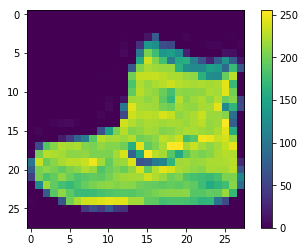

In [4]:
# Let's take a quick look at the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# Notice that it is on a scale of 0-255 but we like our inputs to be from 0-1 for continuity sake

In [5]:
# We can go ahead and normalize and revisualize some data with the appropriate labels
train_images = train_images / 255.0
test_images = test_images / 255.0

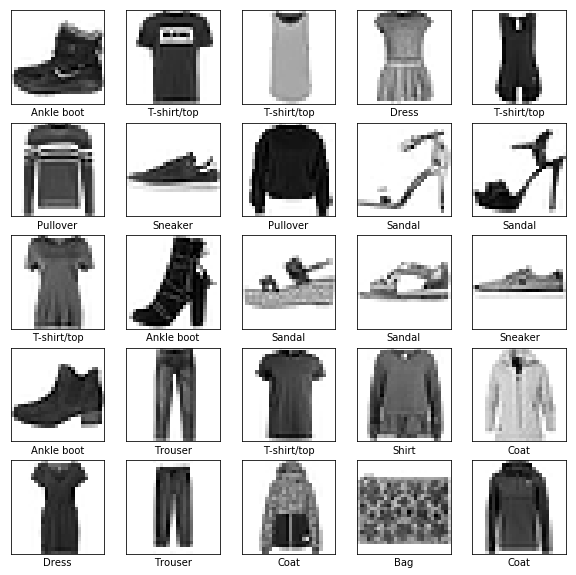

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Step 2: Model

In [10]:
# Lets now build the model and then take a cell to explain
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

- The first layer is just to flatten the input images into vectors which is necessary
- Here we set up a layer with 128 nodes and apply the relu (relaxed linear unit >0) function as the activation function
- Finally we need to split into our 10 values to determine which article of clothing our image represents. the softmax function is a probability function.

In [12]:
# And we must define the optimization scheme for each layer
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- We will use the adam optimizer which is one of many optimization algos available (https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer))
- The loss function tells us how well we are doing. It is the function we are minimizing
- We use the accuracy as a metric to minimize

## Step 3: Train and Test

In [13]:
# Now we train the model through five epochs (meaning five times)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5182 - acc: 0.8197
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3880 - acc: 0.8623
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3526 - acc: 0.8726
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3318 - acc: 0.8790
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3131 - acc: 0.8857


In [14]:
# Now that we have it trained lets test it out!
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3673 - acc: 0.8685
Test accuracy: 0.8685


## Step 4: Verification

In [16]:
# Well what about our predicting capabilities?
predictions = model.predict(test_images)
predictions[0]

array([2.3950988e-06, 1.1281962e-09, 1.7770884e-07, 3.0112803e-06,
       3.1656410e-07, 1.7851204e-02, 4.0178560e-07, 9.4785839e-02,
       2.9943548e-03, 8.8436228e-01], dtype=float32)

What we see as an output is the results from the final layer which uses the softmax function. Each of the values represents a probability that our image is either a shirt, shoe, pant...

In [17]:
# We are going to scrupulously copy this from the tensorflow document because it is a great little subroutine for visualization
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's see how we do for a few images!


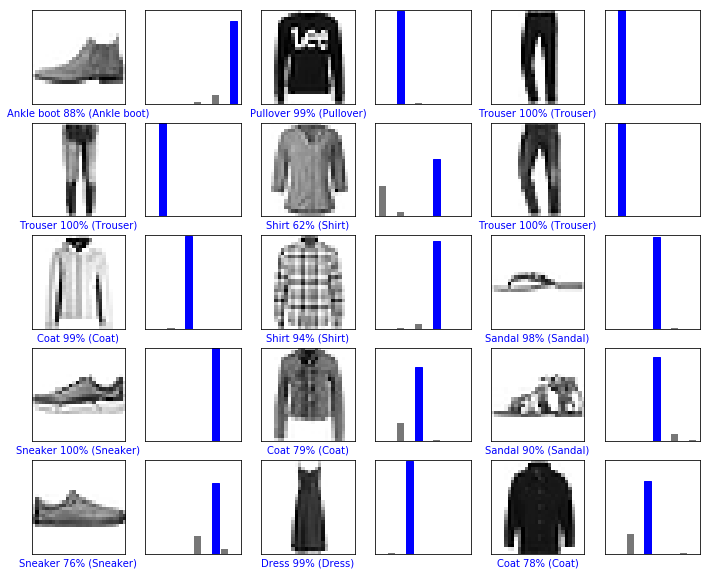

In [18]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


## Conclusion
We can see that our model does a pretty decent job of predicting. Tensorflow allows us to very easily create a machine learning pipeline for classification algorithms.